In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load sample data
df = pd.read_csv("english_profiles.csv")

In [ ]:
df.columns

Index(['firstName', 'lastName', 'headline', 'Keywords_headline',
       'Closest Title', 'Current position', 'companyName', 'country', 'about',
       'Keywords_about', 'Estimated age', 'Number of years of experience',
       'connections', 'Skills 0', 'Skills 1', 'Skills 2', 'Skills 3',
       'Skills 4', 'Skills 5', 'Languages 0', 'Languages 1', 'Languages 2',
       'Languages 3', 'premium', 'verified', 'linkedinUrl'],
      dtype='object')

In [ ]:
print(df['Number of years of experience'].describe())

count    800.000000
mean       8.565137
std        5.608012
min        0.000000
25%        3.670000
50%        8.250000
75%       12.670000
max       21.000000
Name: Number of years of experience, dtype: float64


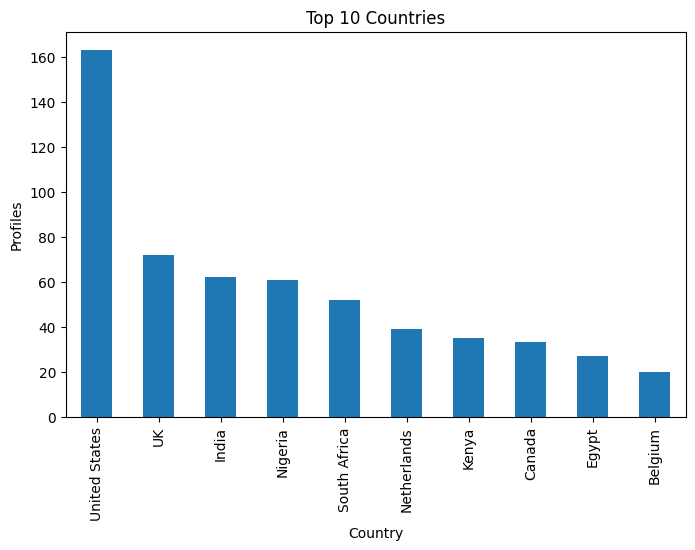

In [ ]:
# ===== 1. Country distribution =====
country_counts = df['country'].value_counts().head(10)
fig1, ax1 = plt.subplots(figsize=(8,5))
country_counts.plot(kind="bar", ax=ax1, title="Top 10 Countries")

ax1.set_xlabel("Country")
ax1.set_ylabel("Profiles")
plt.show()

In [ ]:
print(country_counts)

country
United States    163
UK                72
India             62
Nigeria           61
South Africa      52
Netherlands       39
Kenya             35
Canada            33
Egypt             27
Belgium           20
Name: count, dtype: int64


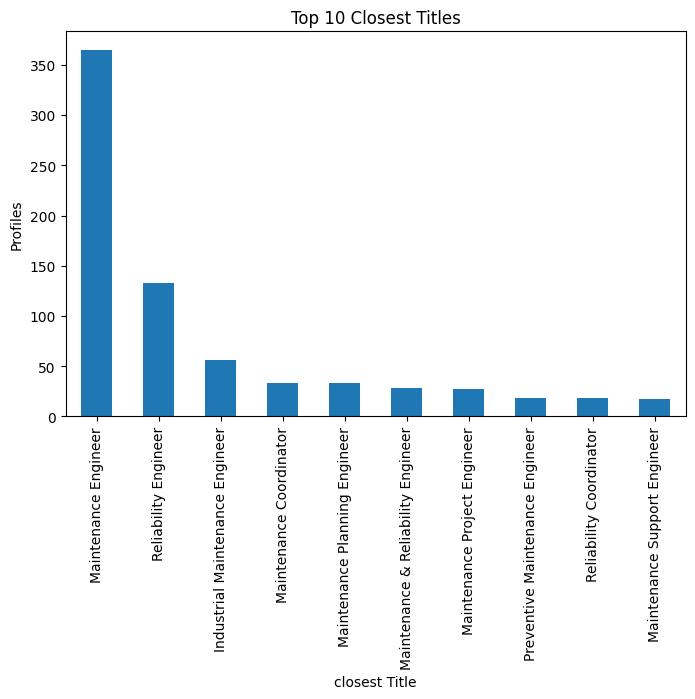

In [ ]:
# ===== 2. Job titles =====
title_counts = df['Target Title'].value_counts().head(10)
fig2, ax2 = plt.subplots(figsize=(8,5))
title_counts.plot(kind="bar", ax=ax2, title="Top 10 Closest Titles")
ax2.set_xlabel("closest Title")
ax2.set_ylabel("Profiles")
plt.show()

In [ ]:
title_counts = df['Closest Title'].value_counts().head(10)
print('top 10 closest titles are :',title_counts)

top 10 closest titles are : Closest Title
Maintenance Engineer                  365
Reliability Engineer                  133
Industrial Maintenance Engineer        56
Maintenance Coordinator                33
Maintenance Planning Engineer          33
Maintenance & Reliability Engineer     28
Maintenance Project Engineer           27
Preventive Maintenance Engineer        18
Reliability Coordinator                18
Maintenance Support Engineer           17
Name: count, dtype: int64


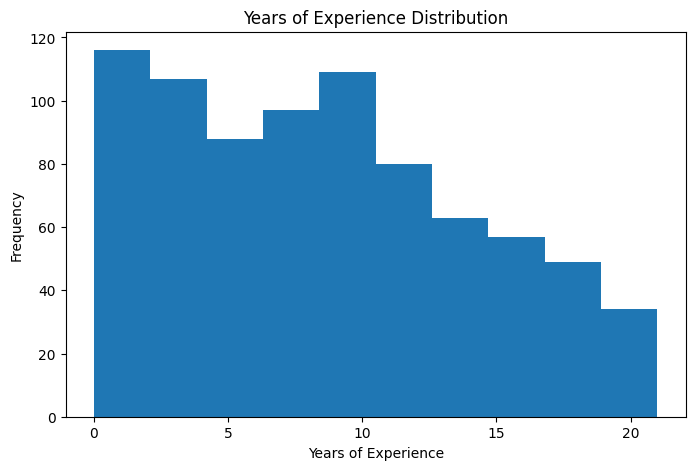

In [ ]:
# ===== 3. Years of experience =====
fig3, ax3 = plt.subplots(figsize=(8,5))
df['Number of years of experience'].dropna().plot(kind="hist", bins=10, ax=ax3, title="Years of Experience Distribution")
ax3.set_xlabel("Years of Experience")
plt.show()

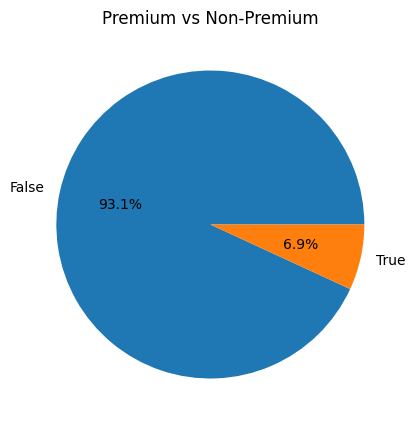

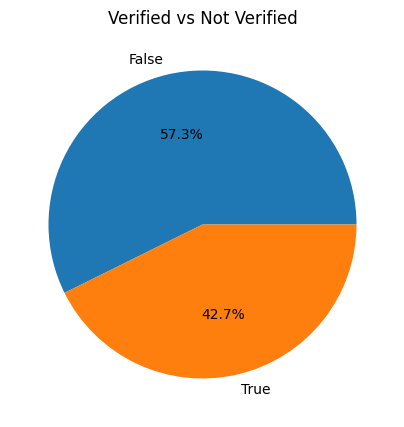

In [ ]:
# Normalize the premium and verified columns
df['premium'] = df['premium'].replace({'False': 'No', 'NO': 'No', 'True': 'Yes', 'YES': 'Yes'})
df['verified'] = df['verified'].replace({'False': 'No', 'NO': 'No', 'True': 'Yes', 'YES': 'Yes'})
# ===== 4. Premium status =====
fig4, ax4 = plt.subplots(figsize=(5,5))
df['premium'].value_counts().plot(kind="pie", autopct='%1.1f%%', ax=ax4, title="Premium vs Non-Premium")
ax4.set_ylabel("")
plt.show()

# ===== 5. Verified status =====
fig5, ax5 = plt.subplots(figsize=(5,5))
df['verified'].value_counts().plot(kind="pie", autopct='%1.1f%%', ax=ax5, title="Verified vs Not Verified")
ax5.set_ylabel("")
plt.show()

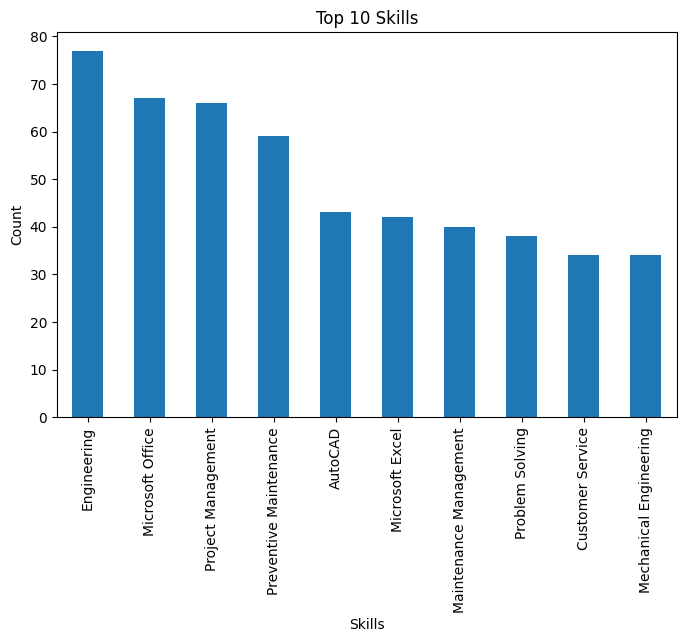

In [ ]:

# ===== 6. Skills =====
skill_cols = [col for col in df.columns if col.startswith("Skills")]
skills = pd.concat([df[col] for col in skill_cols], ignore_index=True).dropna()
skill_counts = skills.value_counts().head(10)
fig6, ax6 = plt.subplots(figsize=(8,5))
skill_counts.plot(kind="bar", ax=ax6, title="Top 10 Skills")
ax6.set_xlabel("Skills")
ax6.set_ylabel("Count")
plt.show()

In [ ]:
skill_cols = [col for col in df.columns if col.startswith("Skills")]
skills = pd.concat([df[col] for col in skill_cols], ignore_index=True).dropna()
skill_counts = skills.value_counts().head(10)
print("top 10 skills:",skill_counts)

top 10 skills: Engineering               77
Microsoft Office          67
Project Management        66
Preventive Maintenance    59
AutoCAD                   43
Microsoft Excel           42
Maintenance Management    40
Problem Solving           38
Customer Service          34
Mechanical Engineering    34
Name: count, dtype: int64


In [ ]:
# ===== 7. Top 10 languages =====
lang_cols = [col for col in df.columns if col.startswith("Languages")]
languages = pd.concat([df[col] for col in lang_cols], ignore_index=True).dropna()


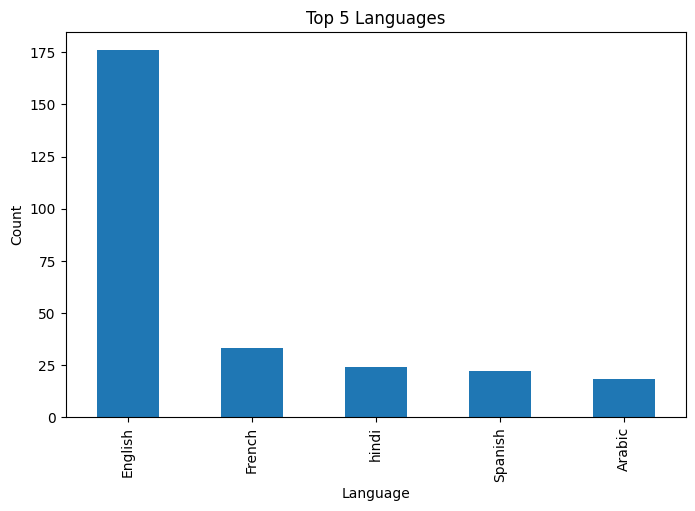

In [ ]:
import unicodedata

def normalize_text(x):
    if isinstance(x, str):
        # Remove accents, lowercase, and strip spaces
        x = ''.join(c for c in unicodedata.normalize('NFD', x) if unicodedata.category(c) != 'Mn')
        return x.strip().lower()
    return x

# Apply normalization
languages = languages.apply(normalize_text)

# Apply mapping AFTER normalization
language_mapping = {
    'anglais': 'English',
    'englais':'English',
    'english': 'English',
    'francais': 'French',
    'french': 'French',
    'arabe': 'Arabic',
    'arabic': 'Arabic',
    'espagnol': 'Spanish',
    'spanish': 'Spanish',
    'allemand': 'German',
    'german': 'German',
    'italien': 'Italian',
    'italian': 'Italian',
    'neerlandais': 'Dutch',
    'dutch': 'Dutch',
    'portugais': 'Portuguese',
    'portuguese': 'Portuguese',
}

languages = languages.replace(language_mapping)

# Now count and plot
lang_counts = languages.value_counts().head(5)
fig7, ax7 = plt.subplots(figsize=(8,5))
lang_counts.plot(kind="bar", ax=ax7, title="Top 5 Languages")
ax7.set_xlabel("Language")
ax7.set_ylabel("Count")
plt.show()



In [ ]:
print("top 5 languages :",lang_counts)

top 5 languages : English    176
French      33
hindi       24
Spanish     22
Arabic      18
Name: count, dtype: int64


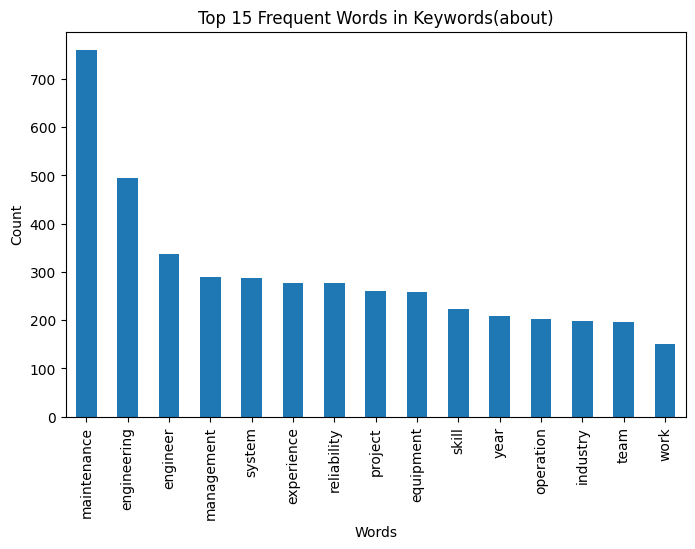

In [ ]:
# ===== Top 10 frequent words in Keywords =====
from collections import Counter
import re
keywords = df['Keywords_about'].dropna().astype(str).tolist()

# Clean text and split into words
words = []
for text in keywords:
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)  # remove punctuation
    words.extend(text.lower().split())

word_counts = Counter(words)
top_words = dict(word_counts.most_common(15))

# Plot
fig, ax = plt.subplots(figsize=(8,5))
pd.Series(top_words).plot(kind="bar", ax=ax, title="Top 15 Frequent Words in Keywords(about)")
ax.set_xlabel("Words")
ax.set_ylabel("Count")
plt.show()

In [ ]:
print("G. Top 15 Frequent Words in Keywords Extracted from About section",top_words)

G. Top 15 Frequent Words in Keywords Extracted from About section {'maintenance': 760, 'engineering': 495, 'engineer': 338, 'management': 290, 'system': 288, 'experience': 277, 'reliability': 276, 'project': 261, 'equipment': 258, 'skill': 224, 'year': 209, 'operation': 202, 'industry': 198, 'team': 197, 'work': 151}


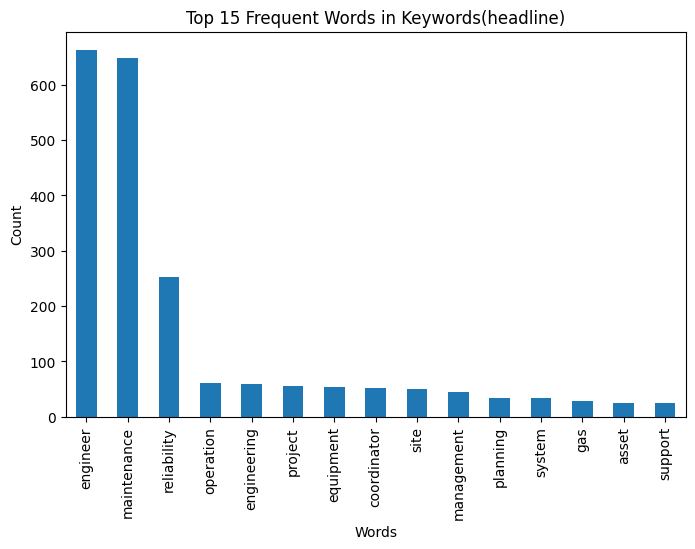

In [ ]:
# ===== Top 10 frequent words in Keywords =====
from collections import Counter
import re
keywords = df['Keywords_headline'].dropna().astype(str).tolist()

# Clean text and split into words
words = []
for text in keywords:
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)  # remove punctuation
    words.extend(text.lower().split())

word_counts = Counter(words)
top_words_2 = dict(word_counts.most_common(15))

# Plot
fig, ax = plt.subplots(figsize=(8,5))
pd.Series(top_words_2).plot(kind="bar", ax=ax, title="Top 15 Frequent Words in Keywords(headline)")
ax.set_xlabel("Words")
ax.set_ylabel("Count")
plt.show()

In [ ]:
print("G. Top 15 Frequent Words in Keywords Extracted from About section",top_words_2)

G. Top 15 Frequent Words in Keywords Extracted from About section {'engineer': 663, 'maintenance': 648, 'reliability': 253, 'operation': 60, 'engineering': 59, 'project': 56, 'equipment': 54, 'coordinator': 51, 'site': 50, 'management': 44, 'planning': 34, 'system': 33, 'gas': 29, 'asset': 25, 'support': 25}


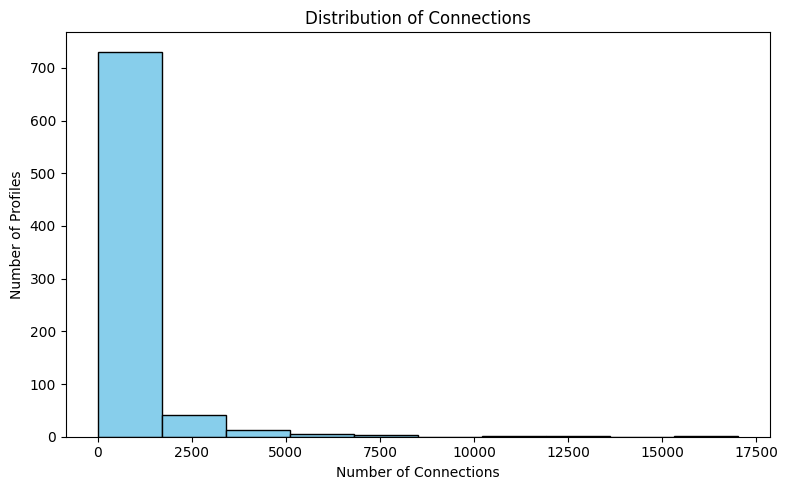

In [ ]:
connections = df['connections'].dropna()

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(connections, bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Connections")
plt.xlabel("Number of Connections")
plt.ylabel("Number of Profiles")
plt.tight_layout()
plt.show()

                                             count       mean       std  \
Closest Title                                                             
Condition Monitoring Engineer                  5.0  30.968000  3.955865   
Continuous Improvement Maintenance Engineer    1.0  39.080000       NaN   
Equipment Reliability Engineer                10.0  34.393000  5.107744   
Industrial Maintenance Engineer               56.0  31.971786  5.639309   
Maintenance & Inspection Engineer              4.0  36.020000  3.586205   
Maintenance & Reliability Engineer            28.0  32.966786  5.242075   
Maintenance Coordinator                       33.0  33.792727  6.512951   
Maintenance Engineer                         365.0  31.604603  5.342458   
Maintenance Improvement Engineer               1.0  30.750000       NaN   
Maintenance Optimization Engineer              3.0  35.250000  4.456333   
Maintenance Performance Engineer               4.0  31.437500  3.542009   
Maintenance Planning Engi

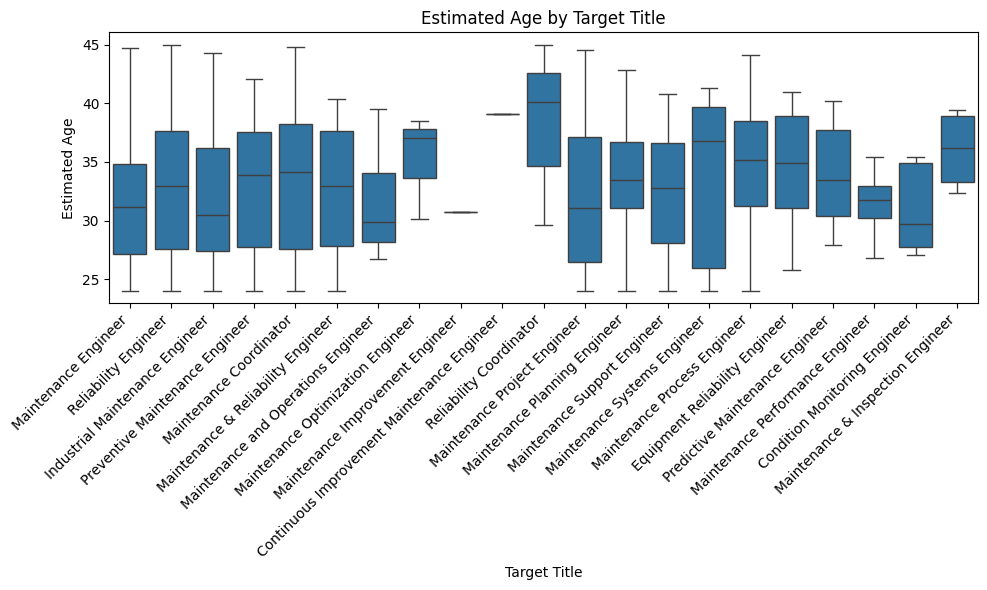

In [ ]:
# Average, min, max, median age per Target Title
age_by_title = df.groupby('Closest Title')['Estimated age'].describe()
print(age_by_title)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x='Closest Title', y='Estimated age', data=df)
plt.xticks(rotation=45, ha='right')
plt.title("Estimated Age by Target Title")
plt.ylabel("Estimated Age")
plt.xlabel("Target Title")
plt.tight_layout()
plt.show()

In [ ]:
# cluster_subset_auto.py
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# -------------------------
# USER PARAMETERS
# -------------------------
CSV_PATH = "english_profiles.csv"  # your dataset
OUTPUT_DIR = "subset_auto_results_3"
RANDOM_STATE = 42
K = 3
TOP_N_WORDS = 20

# -------------------------
# CLEANING & FEATURE DERIVATION
# -------------------------
def ensure_dir(d):
    os.makedirs(d, exist_ok=True)

def extract_top_words(series, top_n=15, stopwords=None):
    if stopwords is None:
        stopwords = set()
    words = []
    for text in series.dropna().astype(str):
        text = re.sub(r"[^a-zàâçéèêëîïôûùüÿñæœ0-9]", " ", text.lower())
        tokens = [w for w in text.split() if w not in stopwords and len(w) > 1]
        words.extend(tokens)
    return [w for w,_ in Counter(words).most_common(top_n)]

def count_matches(text, top_words):
    if pd.isna(text):
        return 0
    text = re.sub(r"[^a-zàâçéèêëîïôûùüÿñæœ0-9]", " ", str(text).lower())
    tokens = set(text.split())
    return sum(1 for w in top_words if w in tokens)

def preprocess_data(df):
    # Log-transform for scale compression
    if "connections" in df.columns:
        df["connections_log"] = np.log1p(df["connections"].fillna(0))

    # Count skills
    skill_cols = [c for c in df.columns if c.lower().startswith("skills")]
    if skill_cols:
        df["skills_count"] = df[skill_cols].replace("", np.nan).notna().sum(axis=1)

    # Count languages
    lang_cols = [c for c in df.columns if c.lower().startswith("languages")]
    if lang_cols:
        df["languages_count"] = df[lang_cols].replace("", np.nan).notna().sum(axis=1)

    # Encode verified/premium
    if "verified" in df.columns:
        df["verified_encoded"] = df["verified"].apply(lambda x: 1 if str(x).lower() in ["yes", "true", "1"] else 0)
    if "premium" in df.columns:
        df["premium_encoded"] = df["premium"].apply(lambda x: 1 if str(x).lower() in ["yes", "true", "1"] else 0)

    # Text lengths
    for col in ["about", "headline", "companyName", "Closest Title"]:
        if col in df.columns:
            df[f"{col}_length"] = df[col].fillna("").apply(lambda x: len(str(x)))

    # Keyword matches (if any keyword columns exist)
    keyword_cols = [c for c in df.columns if "keywords" in c.lower()]
    if keyword_cols:
        combined = df[keyword_cols].fillna("").agg(" ".join, axis=1)
        top_words = extract_top_words(combined, TOP_N_WORDS)
        df["keywords_match_count"] = combined.apply(lambda x: count_matches(x, top_words))

    return df

# -------------------------
# MAIN CLUSTERING FUNCTION
# -------------------------
def run(csv_path):
    ensure_dir(OUTPUT_DIR)
    df = pd.read_csv(csv_path)
    print(f"Loaded {len(df)} rows and {len(df.columns)} columns.")

    df = preprocess_data(df)

    # Candidate numeric features
    numeric_candidates = [
        "Estimated age", "connections_log", "languages_count",
        "verified_encoded", "premium_encoded"
         ,"keywords_match_count","skills_count"
    ]
    numeric_candidates = [f for f in numeric_candidates if f in df.columns]

    # Generate all 2–5 feature combinations
    feature_subsets = []
    for r in range(2, min(6, len(numeric_candidates) + 1)):
        feature_subsets.extend(list(combinations(numeric_candidates, r)))

    print(f"Testing {len(feature_subsets)} feature combinations...")

    results = []
    for feats in feature_subsets:
        feats = list(feats)
        X = df[feats].copy().fillna(df[feats].median())

        # Scale data
        X_scaled = StandardScaler().fit_transform(X)

        # KMeans clustering
        km = KMeans(n_clusters=K, random_state=RANDOM_STATE, n_init=10)
        labels = km.fit_predict(X_scaled)

        # Metrics
        sil = silhouette_score(X_scaled, labels)
        db = davies_bouldin_score(X_scaled, labels)
        ch = calinski_harabasz_score(X_scaled, labels)
        cluster_sizes = Counter(labels)
        size_std = np.std(list(cluster_sizes.values()))

        # PCA visualization
        pca = PCA(n_components=2, random_state=RANDOM_STATE)
        X_pca = pca.fit_transform(X_scaled)
        pca_var = np.sum(pca.explained_variance_ratio_)

        plt.figure(figsize=(7,5))
        for lbl in sorted(set(labels)):
            mask = labels == lbl
            plt.scatter(X_pca[mask,0], X_pca[mask,1], s=35, alpha=0.7, label=f"Cluster {lbl}")
        plt.xlabel("PCA1")
        plt.ylabel("PCA2")
        plt.title(f"{' + '.join(feats)}\nSil={sil:.3f} DB={db:.3f} CH={ch:.1f} Var={pca_var:.2f} SizeStd={size_std:.2f}")
        plt.legend(loc="best", fontsize=8)
        plt.tight_layout()
        plot_fname = os.path.join(OUTPUT_DIR, f"{'_'.join(feats)}_k{K}.png")
        plt.savefig(plot_fname, dpi=150)
        plt.close()

        results.append({
            "features": ";".join(feats),
            "n_features": len(feats),
            "silhouette": sil,
            "davies_bouldin": db,
            "calinski_harabasz": ch,
            "size_std": size_std,
            "pca_explained_var": pca_var,
            "plot_file": plot_fname
        })

        print(f"✔ {feats} → Sil={sil:.3f}, DB={db:.3f}, CH={ch:.1f}, SizeStd={size_std:.2f}")

    # Ranking
    results_df = pd.DataFrame(results)
    results_df.sort_values(
        by=["silhouette", "calinski_harabasz", "davies_bouldin"],
        ascending=[False, False, True],
        inplace=True
    )

    out_csv = os.path.join(OUTPUT_DIR, "subset_ranking.csv")
    results_df.to_csv(out_csv, index=False)
    print(f"\nSaved ranking to {out_csv}")

    best = results_df.iloc[0]
    print(f"\n🏆 Best subset: {best['features']}")
    print(f"Sil={best['silhouette']:.3f}, DB={best['davies_bouldin']:.3f}, CH={best['calinski_harabasz']:.1f}")

    return results_df

# -------------------------
# RUN SCRIPT
# -------------------------
if __name__ == "__main__":
    run(CSV_PATH)



Loaded 800 rows and 26 columns.
Testing 112 feature combinations...
✔ ['Estimated age', 'connections_log'] → Sil=0.404, DB=0.851, CH=675.9, SizeStd=110.30
✔ ['Estimated age', 'languages_count'] → Sil=0.541, DB=0.639, CH=1099.8, SizeStd=92.07
✔ ['Estimated age', 'verified_encoded'] → Sil=0.551, DB=0.582, CH=1010.3, SizeStd=63.90
✔ ['Estimated age', 'premium_encoded'] → Sil=0.592, DB=0.489, CH=1857.2, SizeStd=154.61
✔ ['Estimated age', 'keywords_match_count'] → Sil=0.400, DB=0.866, CH=656.8, SizeStd=37.72
✔ ['Estimated age', 'skills_count'] → Sil=0.569, DB=0.560, CH=1496.8, SizeStd=111.39
✔ ['connections_log', 'languages_count'] → Sil=0.571, DB=0.594, CH=1115.7, SizeStd=159.13
✔ ['connections_log', 'verified_encoded'] → Sil=0.637, DB=0.521, CH=1459.5, SizeStd=105.15
✔ ['connections_log', 'premium_encoded'] → Sil=0.637, DB=0.480, CH=1631.9, SizeStd=229.76
✔ ['connections_log', 'keywords_match_count'] → Sil=0.419, DB=0.815, CH=750.6, SizeStd=103.47
✔ ['connections_log', 'skills_count'] → S


=== Cluster Summary (Averages) ===
             premium_encoded  verified_encoded  Count
Cluster                                              
0                       0.00              1.00  300.0
1                       0.00              0.00  445.0
2                       1.00              0.75   55.0
Overall Avg             0.33              0.58  800.0

Cluster sizes: {np.int32(1): 445, np.int32(0): 300, np.int32(2): 55}


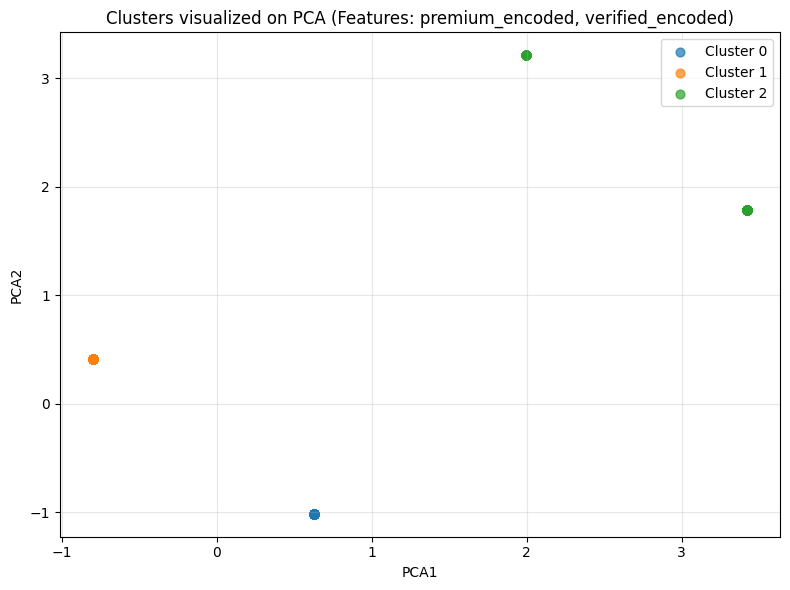

In [ ]:
import re
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# -----------------------------
# USER SETTINGS
# -----------------------------
CSV_PATH = "english_profiles.csv"
K = 3
RANDOM_STATE = 42
TOP_N_WORDS = 20
FEATURES =[ "premium_encoded", "verified_encoded"]
# -----------------------------
# HELPER FUNCTIONS
# -----------------------------
def extract_top_words(series, top_n=15, stopwords=None):
    if stopwords is None:
        stopwords = set()
    words = []
    for text in series.dropna().astype(str):
        text = re.sub(r"[^a-zàâçéèêëîïôûùüÿñæœ0-9]", " ", text.lower())
        tokens = [w for w in text.split() if w not in stopwords and len(w) > 1]
        words.extend(tokens)
    return [w for w,_ in Counter(words).most_common(top_n)]

def count_matches(text, top_words):
    if pd.isna(text):
        return 0
    text = re.sub(r"[^a-zàâçéèêëîïôûùüÿñæœ0-9]", " ", str(text).lower())
    tokens = set(text.split())
    return sum(1 for w in top_words if w in tokens)

def preprocess_data(df):
    if "connections" in df.columns:
        df["connections_log"] = np.log1p(df["connections"].fillna(0))

    skill_cols = [c for c in df.columns if c.lower().startswith("skills")]
    if skill_cols:
        df["skills_count"] = df[skill_cols].replace("", np.nan).notna().sum(axis=1)

    lang_cols = [c for c in df.columns if c.lower().startswith("languages")]
    if lang_cols:
        df["languages_count"] = df[lang_cols].replace("", np.nan).notna().sum(axis=1)

    if "verified" in df.columns:
        df["verified_encoded"] = df["verified"].apply(lambda x: 1 if str(x).lower() in ["yes", "true", "1"] else 0)
    if "premium" in df.columns:
        df["premium_encoded"] = df["premium"].apply(lambda x: 1 if str(x).lower() in ["yes", "true", "1"] else 0)

    keyword_cols = [c for c in df.columns if "keywords" in c.lower()]
    if keyword_cols:
        combined = df[keyword_cols].fillna("").agg(" ".join, axis=1)
        top_words = extract_top_words(combined, TOP_N_WORDS)
        df["keywords_match_count"] = combined.apply(lambda x: count_matches(x, top_words))

    for col in ["about", "headline", "companyName", "Closest Title"]:
        if col in df.columns:
            df[f"{col}_length"] = df[col].fillna("").apply(lambda x: len(str(x)))

    return df

# -----------------------------
# MAIN
# -----------------------------
df = pd.read_csv(CSV_PATH)
df = preprocess_data(df)

# Ensure features exist
missing = [f for f in FEATURES if f not in df.columns]
if missing:
    raise ValueError(f"Missing required features: {missing}")

# Keep selected features
X = df[FEATURES].copy().fillna(df[FEATURES].median())

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=K, random_state=RANDOM_STATE, n_init=10)
labels = kmeans.fit_predict(X_scaled)
df["Cluster"] = labels

# -----------------------------
# PRINT SUMMARY
# -----------------------------
summary = df.groupby("Cluster")[FEATURES].mean().round(2)
summary["Count"] = df["Cluster"].value_counts().sort_index().values
summary.loc["Overall Avg"] = summary[FEATURES].mean().round(2).to_list() + [len(df)]

print("\n=== Cluster Summary (Averages) ===")
print(summary)
print("\nCluster sizes:", dict(Counter(labels)))

# -----------------------------
# PCA PLOT
# -----------------------------
pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
for lbl in sorted(set(labels)):
    mask = labels == lbl
    plt.scatter(X_pca[mask,0], X_pca[mask,1], s=40, alpha=0.7, label=f"Cluster {lbl}")

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title(f"Clusters visualized on PCA (Features: {', '.join(FEATURES)})")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
df.to_csv("Dataset_with_Clusters.csv", index=False, encoding="utf-8")


In [ ]:
for cluster_id in sorted(df["Cluster"].unique()):
    df[df["Cluster"] == cluster_id].to_csv(f"Cluster_{cluster_id}.csv", index=False, encoding="utf-8")

